What is backpropagation?\
Ans: backpropagation is a method of learning that uses a gradient descent algorithm to find the optimal weights of a neural network.

What is forward propagation?\
Ans: forward propagation is the process of passing an input through a neural network to get the output.

What is gradient descent?\
Ans: gradient descent is an algorithm that uses a gradient to find the optimal weights of a neural network.

What is activation function?\
Ans: activation function is a function that takes an input and returns an output.

Why we need activation function?\
Ans: activation function is used to make sure that the output is between 0 and 1.

Why we will sigmoid function?\
ans: The main reason why we use sigmoid function is because it exists between (0 to 1). Therefore, it is especially used for models where we have to predict the probability as an output.


In [1]:
# Neural Network from scratch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [2]:
# Load dataset 0 mnist
from matplotlib import image
image_path = 'trainingSet/0'

In [3]:
#Show how many images are in the folder
print(len(os.listdir(image_path)))

4132


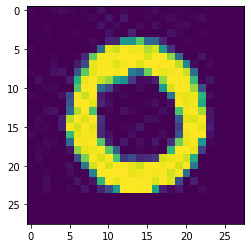

In [4]:
#show one image
image_file = os.path.join(image_path, os.listdir(image_path)[0])
img = image.imread(image_file)
plt.imshow(img)

In [5]:
# Image binarization
def binarize(img):
    img = img.astype(np.float32)
    img = np.where(img < 0.5, 0, 1)
    return img
    

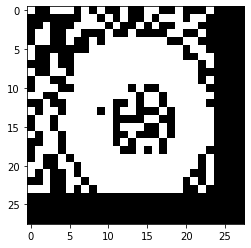

In [7]:
# Show the matrix
plt.imshow(img.reshape(28,28), cmap='gray')
plt.show()

#### 0 means black
#### 1 means white
#### Pixel values are between 0 and 1

In [8]:
#show the binary matrix using 0 and 1
print(img)

[[1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
  1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0
  1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0
  0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0
  0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
  0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1
  1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1
  1 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0
  0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0
  1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 0
  1 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1
  1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 

In [28]:
# Our matrix is a vector of 28x28x1 so we need to reshape it to 28x28
img = img.reshape(28,28)
print(img)

[[1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0]
 [0 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0]
 [0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0]
 [0 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0]
 [1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0]
 [0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0]
 [1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0]
 [0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0]
 [1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0]
 [0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0]
 [1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 0 0 0]
 [0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0]
 [0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0]
 [1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 1 1 1 0 0 0 

In [29]:
# define sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [ ]:
# define derivative of sigmoid function
def sigmoid_derivative(x):
    return x*(1-x)
# we need derivatives of sigmoid function to calculate the error

In [30]:
# making input layer with 28 neurons
input_layer = np.random.rand(28,28)
print(input_layer)

[[4.22035917e-01 9.87040435e-01 6.76155903e-02 7.34244683e-01
  2.37233003e-01 3.56973817e-02 9.40687749e-01 7.42954848e-01
  9.09994936e-01 1.90658613e-01 3.83571915e-01 8.13778195e-01
  8.53232859e-01 3.01865112e-01 7.91210853e-02 1.97338516e-01
  1.29090986e-01 2.48578799e-01 9.18695261e-01 5.20227420e-01
  2.44588801e-01 5.52337962e-01 3.63105746e-01 7.21029413e-01
  8.88520485e-03 7.98328784e-01 8.79469160e-01 4.92507568e-01]
 [7.20599837e-01 7.10646113e-01 3.30557828e-01 7.45597434e-01
  8.37976421e-01 8.86574430e-01 3.78407553e-02 9.62467034e-02
  9.54449267e-01 5.18663634e-01 5.79398912e-01 8.98981057e-01
  4.88731218e-01 4.23550059e-01 2.86300206e-01 3.15180521e-01
  3.70984268e-01 2.16580111e-01 2.11985314e-01 4.34127937e-01
  3.64400484e-01 3.58317187e-01 4.07703245e-01 8.63951441e-01
  4.41693622e-01 7.65731604e-02 3.27880711e-01 3.31612847e-01]
 [5.80939586e-01 8.68315219e-01 3.22212172e-01 7.64854180e-01
  5.18577583e-01 7.97286241e-01 8.73280853e-02 6.56507204e-01
  7.41

In [31]:
# define bias and weights
bias = np.random.rand(1)
weights = np.random.rand(28,28)
print(weights) 

[[0.86108066 0.53514522 0.2794574  0.02769679 0.00847167 0.05338504
  0.06408331 0.2999462  0.35563041 0.03493898 0.47366842 0.05366154
  0.17966584 0.92357206 0.78868638 0.0520914  0.88059064 0.41647582
  0.92222188 0.13319362 0.06766615 0.11335567 0.57607208 0.41871625
  0.2483677  0.71664679 0.75341267 0.19962399]
 [0.51201686 0.57552881 0.60499895 0.55321007 0.26157151 0.39137208
  0.612293   0.83372204 0.13526239 0.3792288  0.45651665 0.97420627
  0.96226835 0.3676991  0.1569577  0.65285005 0.35916814 0.12347511
  0.90006689 0.25830305 0.9676669  0.54420359 0.6069488  0.35031784
  0.73818567 0.10660619 0.99334337 0.58245347]
 [0.02009255 0.35669414 0.76193311 0.37592126 0.56724092 0.89132929
  0.39652981 0.99056396 0.45729537 0.14290007 0.06331952 0.26189282
  0.68248418 0.1970635  0.05484605 0.41465412 0.49487889 0.08646555
  0.68579176 0.36718576 0.68772324 0.8584882  0.91861857 0.57504559
  0.33509785 0.05018666 0.21563962 0.3871166 ]
 [0.26524383 0.24196891 0.53692477 0.304965